In [164]:
import pandas as df
import numpy as np
import matplotlib.pyplot as plt

In [165]:
pd = df.read_csv(f"C:\\Users\\doguy\Desktop\\ds_file\\ds_salaries.csv")

In [166]:
pd.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [167]:
pd.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [168]:
pd.isnull().sum() #✔️

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Queries and Insights

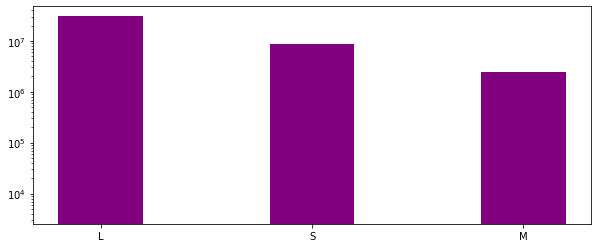

In [169]:
pd.work_year = pd.work_year.astype(int)
x = pd.company_size
y = pd.salary

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(x, y, color ='purple',
        width = 0.4)

plt.yscale("log")


(-1.2279335470604404,
 1.115859375523942,
 -1.104369767225111,
 1.1187449599741022)

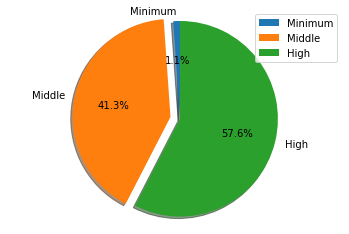

In [170]:
minimum = pd.loc[(pd["salary"] >= 0) & (pd["salary"] <=10000)].count()[0]
middle = pd.loc[(pd["salary"] >=10000)  & (pd["salary"] <= 100000)].count()[0]
high = pd.loc[(pd["salary"] >=100000) ].count()[0]

labels = ["Minimum","Middle","High"]
sizes = [minimum,middle,high]
explode = (0, 0.1, 0,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
ax1.axis('equal')

In [171]:
import plotly.express as px
z=pd['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'Job Title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Science')
fig.show()


In [172]:
fig=px.pie(pd.groupby('company_size',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='company_size',values='salary_in_usd',color='company_size',hole=0.7,labels={'company_size':'Company Size','salary_in_usd':'count'},template='ggplot2',title='<b> Company Sizes in Data Science Feild')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [173]:
# Thanks VARUN SAI KANURI // KAGGLE

fig=px.pie(pd.groupby('experience_level',as_index=False)['salary'].count().sort_values(by='salary',ascending=True).head(10),names='experience_level',values='salary',color='experience_level',hole=0.7,labels={'experience_level':'experience_level Size','salary':'count'},template='ggplot2',title='<b> Experience Level / Salary')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

# Conclusion

The Companies&Salaries are regularly scattered but small companies pays much more than Medium companies

Data Scientist salaries are high with %57.6, middle with % 41.3 and minimum with %1.1

### Top 5 Popular Roles in Data Science
    ⚫Data Scientist with 143
    ⚫Data Engineer with 132
    ⚫Data Analyst with 97
    ⚫Machine Learning Engineer with 41
    ⚫Research Scientist with 16

### Experience Level&Salary

    ⚫SE is higher than every level with %46.1
    ⚫MI is higher than EN,EX with %35.1
    ⚫En is with %14.5 and EX is with %4.28 

In [174]:
for feature in pd.columns[:]:
    print(feature,":",len(pd[feature].unique()),'labels')

Unnamed: 0 : 607 labels
work_year : 3 labels
experience_level : 4 labels
employment_type : 4 labels
job_title : 50 labels
salary : 272 labels
salary_currency : 17 labels
salary_in_usd : 369 labels
employee_residence : 57 labels
remote_ratio : 3 labels
company_location : 50 labels
company_size : 3 labels


In [175]:
pd.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# FEATURE ENGINEERING

In [176]:
## HANDLING CATEGORICAL AND ORDINAL FEATURES

pd.employment_type.unique()
pd_employment = df.get_dummies(pd.employment_type,drop_first = True) #EMPLOYMENT_TYPE

pd.salary_currency.unique()
pd_salary_currency = df.get_dummies(pd.salary_currency,drop_first = True) #SALARY CURRENCY

#pd.company_size.unique() ADDED
#pd_company_size = df.get_dummies(pd.company_size,drop_first = True) #COMPANY SIZE ADDED

company_location = pd.company_location.value_counts().sort_values(ascending = False).head(10).index #COMPANY LOCATION(10)
#Index(['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'PT'], dtype='object')
company_location = df.get_dummies(company_location,drop_first = True)

lst = pd.employee_residence.value_counts().sort_values(ascending = False).head(10).index #EMPLOYEE RESIDENCE WITH MULTIPLE
lst = list(lst)
pd_employee = df.get_dummies(lst,drop_first = True)

#Job title is already done

job_titles = pd.job_title.value_counts().sort_values(ascending = False).head(10).index #JOB TITLE
pd = pd.drop(["job_title"], axis = 1)
job_titles= df.get_dummies(job_titles,drop_first = True)

#pd = pd.drop(["Unnamed: 0"], axis = 1)


In [177]:
#EXPERIENCE LEVEL FEATURE
dictionary = { #Dictionary for ordinal handling .map() func
    
    'SE':1,
    'MI':2,
    'EN':3,
    'EX':4,
}
experience_level = pd.experience_level.map(dictionary) #EXPERIENCE LEVEL WITH ORDINAL

#pd = pd.drop(["remote_ratio"],axis=1)
pd.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,150000,USD,150000,US,50,US,L


In [180]:
final2 = pd.drop(["experience_level","employment_type","salary_currency","employee_residence","company_location","company_size"],axis=1)
salary = final2.salary
# salary_usd = final2.salary_in_usd #USELESS

frames= [job_titles,pd_employee,pd_salary_currency,salary,salary_usd,pd_employment,company_location,experience_level]
df.concat(frames,axis=1)

#Problem statement: Merging 2 Dataframe may create NaN values also another problem statement is merging every feature 
    #in a single variable may extend the time of process.

so1 = df.concat([job_titles,pd_employee],axis=1) #2 FEATURES FOR MERGING
so2 = df.concat([pd_salary_currency,pd_employment,experience_level],axis=1) #3 FEATURES FOR MERGING


finals = df.merge(so1,so2) #MERGING
finals.astype(int) #STR TO INT
finals.isnull().sum() #NO MISSING VALUES

finals

,Data Analyst,Data Analytics Manager,Data Architect,Data Engineer,Data Science Manager,Data Scientist,Machine Learning Engineer,Machine Learning Scientist,Research Scientist,DE,...,INR,JPY,MXN,PLN,SGD,TRY,USD,FL,FT,experience_level
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5379,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5380,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5381,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


# Machine Learning

In [162]:
#copy = final2.salary.copy()
#salary = df.concat([copy,salary])
Data = finals.join(salary, how = 'right') #how = "inner" reduce the number of rows in the data.
Data.salary.fillna(Data.salary.median())


0       70000
0       70000
0       70000
0       70000
0       70000
        ...  
606    200000
606    200000
606    200000
606    200000
606    200000
Name: salary, Length: 10926, dtype: int64

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

X = Data.drop("salary",axis=1)
Y = Data['salary']

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state = 9999)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)
predicted_y = clf.predict(x_test)
                              

r2_score(y_test, predicted_y, sample_weight=None, multioutput=None) , clf.score(x_test,y_test)

(0.09192692216866516, 0.09192692216866516)

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)
    
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, subsample=0.5)

 The best score across ALL searched params:
 0.015586707091755525

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

def test(models, x,y, iterations = 5000):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [161]:
#models = {'OLS': linear_model.LinearRegression(),
#         'Lasso': linear_model.Lasso(),
#         'Ridge': linear_model.Ridge(),}
#x = Data.drop("salary",axis=1)
#y = Data["salary"]
#test(models,x ,y)

C:\Users\doguy\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.277e+12, tolerance: 2.262e+12

C:\Users\doguy\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.277e+12, tolerance: 2.262e+12

C:\Users\doguy\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.304e+12, tolerance: 2.053e+12

C:\Users\doguy\Anaconda\lib\site-packages\sklearn\linear_model\_coordi

,OLS,Lasso,Ridge
0,0.042523,0.043351,0.043129
1,0.037694,0.036347,0.036741
